<a href="https://colab.research.google.com/github/IrfanKpm/machine-learning-diaries/blob/main/TensorFlow/_009_Malaria_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.tensorflow.org/datasets/catalog/malaria

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

## **dataset preparation**

In [3]:
dataset, dataset_info = tfds.load('malaria',with_info=True,shuffle_files=True,as_supervised=True,split=['train'])


In [4]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

In [5]:
dataset_ = tf.data.Dataset.range(10)

In [6]:
print(dataset_)
print(dataset_.as_numpy_iterator())

<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7fd87bd2b220>)


In [7]:
dataset_ = dataset_.take(9)
list(dataset_.as_numpy_iterator())

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [8]:
dataset_ = dataset_.skip(3)
list(dataset_.as_numpy_iterator())

[3, 4, 5, 6, 7, 8]

In [21]:
#GCm_f6plH3I

In [9]:
TRAIN_RATIO = 0.7
TEST_RATIO = 0.2
VAL_RATIO = 0.1

n = len(dataset[0]) # 27558
print(f'Size : {n}')

# Calculate the number of samples for each split
train_size = int(TRAIN_RATIO * n)
test_size = int(TEST_RATIO * n)
val_size = n - train_size - test_size  # Remaining samples for validation

print(f'Train Size: {train_size}')
print(f'Test Size: {test_size}')
print(f'Validation Size: {val_size}')

Size : 27558
Train Size: 19290
Test Size: 5511
Validation Size: 2757


In [10]:
# Splitting the dataset
train_dataset = dataset[0].take(train_size)  # First 70% for training
remaining_dataset = dataset[0].skip(train_size)  # Remaining 20% for testing and validation
test_dataset = remaining_dataset.take(test_size)  # First half of the remaining 20% for testing
val_dataset = remaining_dataset.skip(test_size)  # Last half of the remaining 10% for validation

# Verify the number of elements in each split
print(f'Number of elements in train_dataset: {len(list(train_dataset))}')
print(f'Number of elements in test_dataset: {len(list(test_dataset))}')
print(f'Number of elements in val_dataset: {len(list(val_dataset))}')

Number of elements in train_dataset: 19290
Number of elements in test_dataset: 5511
Number of elements in val_dataset: 2757


In [11]:
# Example: Iterate through a few examples from the training data
for i,(image,label) in enumerate(train_dataset.take(16)):
   print(i,(image.shape,label))

0 (TensorShape([145, 148, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=1>)
1 (TensorShape([133, 127, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=1>)
2 (TensorShape([118, 118, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=0>)
3 (TensorShape([124, 121, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=1>)
4 (TensorShape([151, 148, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=0>)
5 (TensorShape([151, 130, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=0>)
6 (TensorShape([139, 175, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=1>)
7 (TensorShape([151, 139, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=0>)
8 (TensorShape([160, 148, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=0>)
9 (TensorShape([124, 130, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=1>)
10 (TensorShape([133, 136, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=1>)
11 (TensorShape([145, 163, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=0>)
12 (TensorShape([112, 115, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=0>)
13 (Tenso

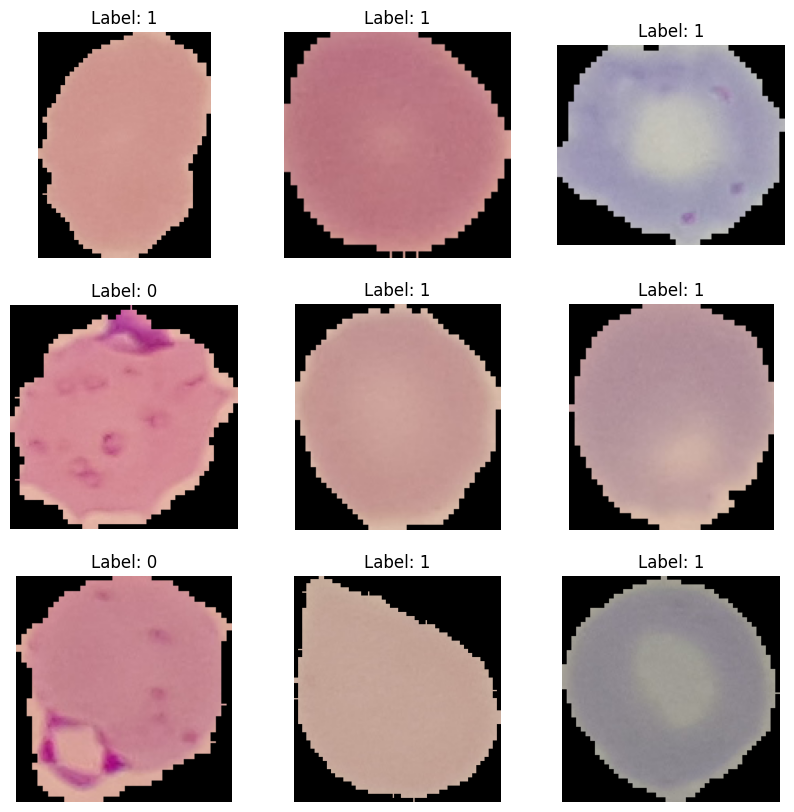

In [12]:
# Set up a 3x3 subplot
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_dataset.take(9)):  # Take the first 9 images
    plt.subplot(3, 3, i + 1)  # Create a subplot (3x3 grid)
    plt.imshow(image.numpy().astype("uint8"))  # Convert image to numpy and plot
    plt.title(f'Label: {label.numpy()}')  # Show label as the title
    plt.axis('off')  # Turn off the axis

plt.show()  # Display the plot

## **data preprocessing**

In [13]:
IM_SIZE = 224

def resize_rescale(image,label):
     return tf.image.resize(image,(IM_SIZE,IM_SIZE))/255.0,label

In [14]:
train_dataset = train_dataset.map(resize_rescale)

In [15]:
for image,label in train_dataset.take(1):
    print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


Size: 27558
Train Size: 19290
Test Size: 5511
Validation Size: 2757
Number of elements in train_dataset: 19290
Number of elements in test_dataset: 5511
Number of elements in val_dataset: 2757
0 (TensorShape([151, 115, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=1>)
1 (TensorShape([121, 115, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=0>)
2 (TensorShape([157, 136, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=0>)
3 (TensorShape([151, 148, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=1>)
4 (TensorShape([133, 112, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=0>)
5 (TensorShape([109, 118, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=1>)
6 (TensorShape([115, 115, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=0>)
7 (TensorShape([103, 91, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=1>)
8 (TensorShape([118, 142, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=1>)
9 (TensorShape([145, 142, 3]), <tf.Tensor: shape=(), dtype=int64, numpy=1>)
10 (TensorShape([187, 250, 3]), <tf.Tensor: shape

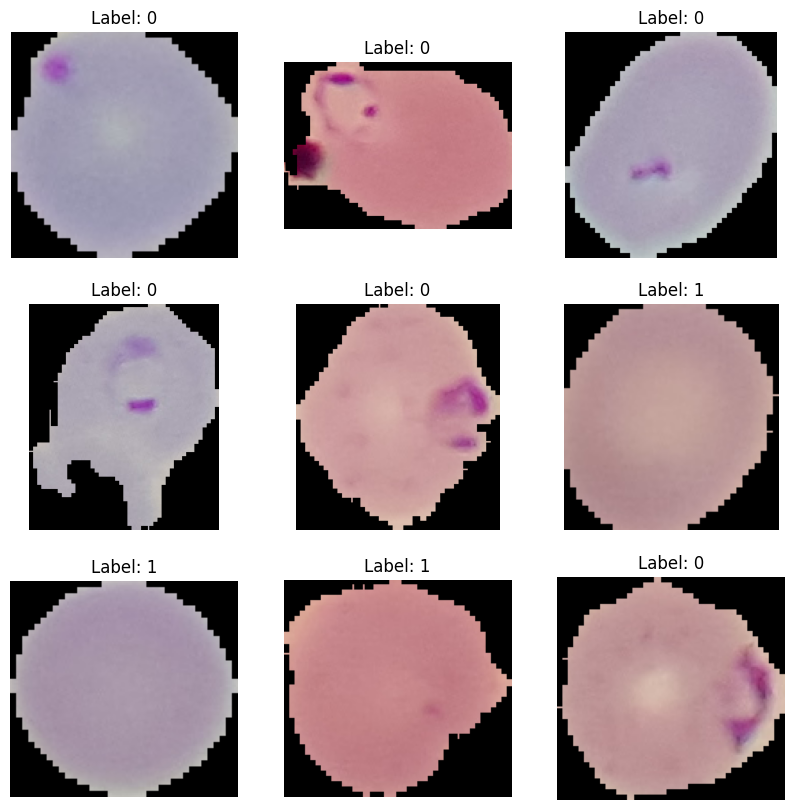

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the Malaria dataset
dataset, dataset_info = tfds.load('malaria', with_info=True, shuffle_files=True, as_supervised=True, split=['train'])

# Define dataset splitting ratios
TRAIN_RATIO = 0.7
TEST_RATIO = 0.2
VAL_RATIO = 0.1

# Get the total number of samples
n = len(dataset[0])
print(f'Size: {n}')

# Calculate the number of samples for each split
train_size = int(TRAIN_RATIO * n)
test_size = int(TEST_RATIO * n)
val_size = n - train_size - test_size  # Remaining samples for validation

print(f'Train Size: {train_size}')
print(f'Test Size: {test_size}')
print(f'Validation Size: {val_size}')

# Splitting the dataset
train_dataset = dataset[0].take(train_size)  # First 70% for training
remaining_dataset = dataset[0].skip(train_size)  # Remaining 30% for testing and validation
test_dataset = remaining_dataset.take(test_size)  # First 20% for testing
val_dataset = remaining_dataset.skip(test_size)  # Last 10% for validation

# Verify the number of elements in each split
print(f'Number of elements in train_dataset: {len(list(train_dataset))}')
print(f'Number of elements in test_dataset: {len(list(test_dataset))}')
print(f'Number of elements in val_dataset: {len(list(val_dataset))}')

# Example: Iterate through a few examples from the training data
for i, (image, label) in enumerate(train_dataset.take(16)):
    print(i, (image.shape, label))

# Set up a 3x3 subplot to visualize some images
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_dataset.take(9)):  # Take the first 9 images
    plt.subplot(3, 3, i + 1)  # Create a subplot (3x3 grid)
    plt.imshow(image.numpy().astype("uint8"))  # Convert image to numpy and plot
    plt.title(f'Label: {label.numpy()}')  # Show label as the title
    plt.axis('off')  # Turn off the axis

plt.show()  # Display the plot

# Define image size and batch size
IM_SIZE = 224
BATCH_SIZE = 32

# Define a function to preprocess the images
def preprocess_image(image, label):
    image = tf.image.resize(image, (IM_SIZE, IM_SIZE))
    image = image / 255.0  # Normalize the image
    return image, label

# Apply preprocessing to the datasets
train_dataset = train_dataset.map(preprocess_image).batch(BATCH_SIZE)
val_dataset = val_dataset.map(preprocess_image).batch(BATCH_SIZE)
test_dataset = test_dataset.map(preprocess_image).batch(BATCH_SIZE)




In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(IM_SIZE, IM_SIZE, 3)),  # Specify input shape here
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),  # Fewer filters
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),  # Fewer filters
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),  # Fewer units
    tf.keras.layers.Dense(2, activation='softmax')  # Binary classification
])

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 863s 1s/step - accuracy: 0.6998 - loss: 0.6953 - val_accuracy: 0.9267 - val_loss: 0.2078
Epoch 2/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 860s 1s/step - accuracy: 0.9300 - loss: 0.2001 - val_accuracy: 0.9383 - val_loss: 0.1829
Epoch 3/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 864s 1s/step - accuracy: 0.9473 - loss: 0.1541 - val_accuracy: 0.9376 - val_loss: 0.1791
Epoch 4/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 938s 1s/step - accuracy: 0.9584 - loss: 0.1194 - val_accuracy: 0.9300 - val_loss: 0.1998
Epoch 5/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 894s 1s/step - accuracy: 0.9712 - loss: 0.0816 - val_accuracy: 0.9202 - val_loss: 0.2475
Epoch 6/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 853s 1s/step - accuracy: 0.9789 - loss: 0.0591 - val_accuracy: 0.9184 - val_loss: 0.2686
Epoch 7/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 855s 1s/step - accuracy: 0.9859 - loss: 0.0449 - val_accuracy: 0.9217 - val_loss: 0.2872
Epoch 8/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 843s 1s/step - accuracy: 0.9891 - loss: 0.0327 - val_accu

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       5,972,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,931,752 (68.40 MB)

 Trainable params: 5,977,250 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,954,502 (45.60 MB)

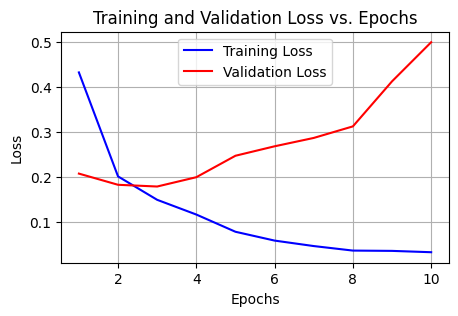

In [7]:
# Extracting data
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc}')

173/173 ━━━━━━━━━━━━━━━━━━━━ 104s 508ms/step - accuracy: 0.9303 - loss: 0.5769
Test Accuracy: 0.9341317415237427


In [16]:
# Save the model to the /content directory
model.save('/content/malaria_diagnosis_model.h5')

In [17]:
# django based project using this model , sooon.... >> mini-ml-projects (git-repo)